In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1) Import required libraries**

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
#from keras import backend as K

import math
import datetime
import platform

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
tf.__version__

'2.7.0'

**2) Data loading and exploration**

In [ ]:
fpath = "/content/drive/MyDrive/datasets"
random_seed = 111

categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['Viral Pneumonia', 'covid negative', 'covid positive'] 

No. of categories =  3


In [ ]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category)[:]:
            file_ext = image_name.split(".")[-1]
            if (file_ext.lower() == "jpg") or (file_ext.lower() == "jpeg") or (file_ext.lower() == "png"):
                print(f"\nCategory = {category}, Image name = {image_name}") 
                img = cv2.imread(fpath+"/"+category+"/"+image_name)
                #print(img)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                #print(img)
                img_array = Image.fromarray(img, 'RGB')
                #print(img_array)
                #resize image to 299 x 299 because the input image resolution for vggNet is 299 x 299
                resized_img = img_array.resize((227, 227))
                #print(resized_img)
                img_lst.append(np.array(resized_img))

                labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

Streaming output truncated to the last 5000 lines.
Category = covid positive, Image name = COVID-556.png

Category = covid positive, Image name = COVID-561.png

Category = covid positive, Image name = COVID-555.png

Category = covid positive, Image name = COVID-559.png

Category = covid positive, Image name = COVID-565.png

Category = covid positive, Image name = COVID-560.png

Category = covid positive, Image name = COVID-566.png

Category = covid positive, Image name = COVID-563.png

Category = covid positive, Image name = COVID-56.png

Category = covid positive, Image name = COVID-557.png

Category = covid positive, Image name = COVID-553.png

Category = covid positive, Image name = COVID-558.png

Category = covid positive, Image name = COVID-576.png

Category = covid positive, Image name = COVID-568.png

Category = covid positive, Image name = COVID-57.png

Category = covid positive, Image name = COVID-570.png

Category = covid positive, Image name = COVID-573.png

Category = covid

In [ ]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (7316, 227, 227, 3) 
Labels shape =  (7316,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Training data shape :  (7316, 227, 227, 3) (7316,)
Total number of outputs :  3
Output classes :  [0 1 2]


Text(0.5, 1.0, 'Leaf : 0')

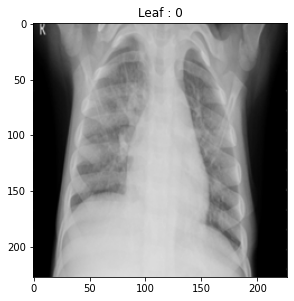

In [ ]:
print('Training data shape : ', images.shape,labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(images[25,:,:], cmap='gray')
plt.title("Leaf : {}".format(labels[25]))



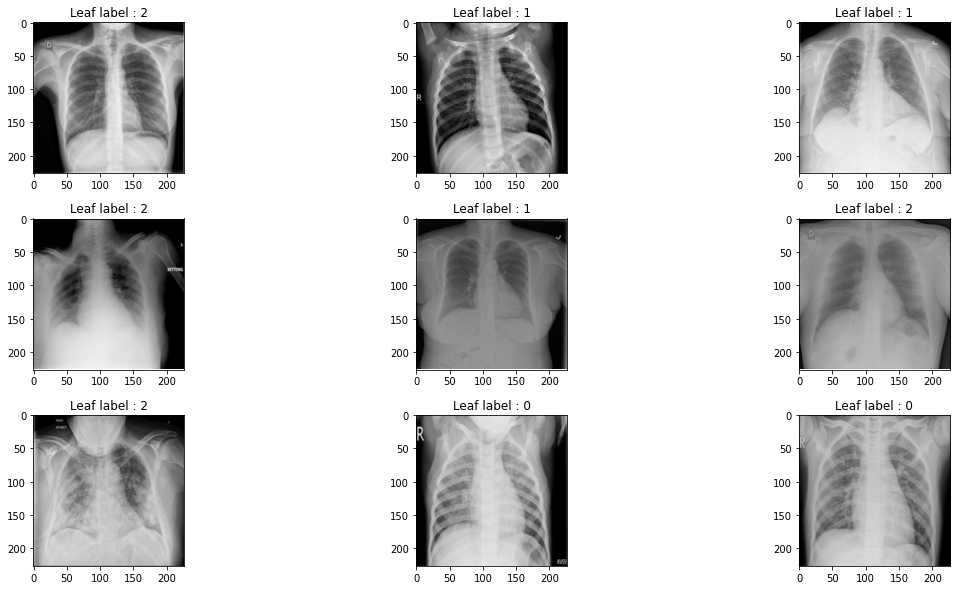

In [ ]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        #plt.figure(figsize=[10,5])

        plt.title('Leaf label : {}'.format(labels[r[0]]))
#        plt.xticks([])
#       plt.yticks([])
      
    plt.show()
    
display_rand_images(images, labels)

**3) Prepare data for CNN model training**

Step 1 - shuffle the data loaded from the dataset

In [ ]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
#print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
#print("\n'n' values after shuffling = ",n)

In [ ]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (7316, 227, 227, 3) 
Labels shape after shuffling =  (7316,)


Step 2 - Data normalization

In [ ]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (7316, 227, 227, 3)


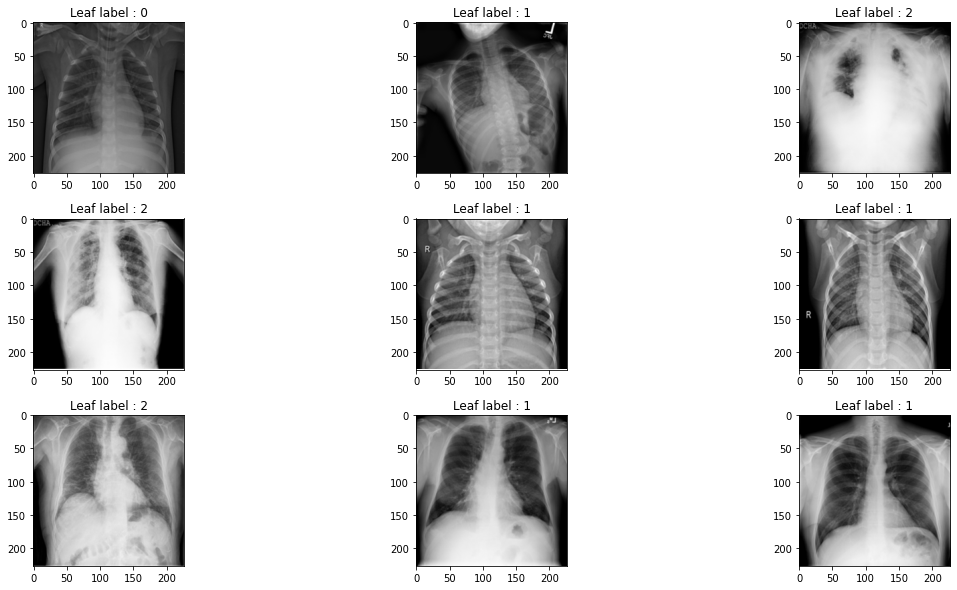

In [ ]:
display_rand_images(images, labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state =0)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("\ny_test shape = ",y_test.shape)



x_train shape =  (5121, 227, 227, 3)
y_train shape =  (5121,)

x_test shape =  (2195, 227, 227, 3)

y_test shape =  (2195,)


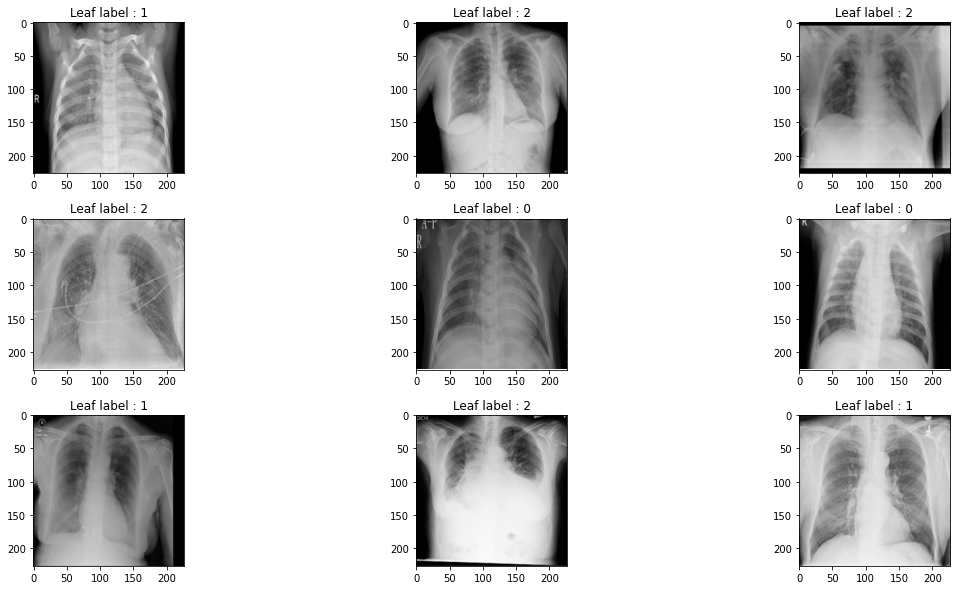

In [ ]:
display_rand_images(x_train, y_train)

**4) Define CNN model (AlexNet)**

In [ ]:
from tensorflow.keras.layers import (
    BatchNormalization
)

In [ ]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))
model.add(BatchNormalization())
#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))



#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))
model.add(BatchNormalization())
#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))



#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(BatchNormalization())
#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(BatchNormalization())
#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(BatchNormalization())
#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

#2 dense layer
model.add(Dense(4096, activation="relu"))

model.add(Dropout(0.4))

#3 dense layer
model.add(Dense(1000, activation="relu"))

model.add(Dropout(0.4))

#output layer
model.add(Dense(3, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 23, 23, 256)      1024      
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Accuracy

In [ ]:
hist= model.fit(x_train, y_train, batch_size=55, epochs=15)

Epoch 1/15
94/94 [==============================] - 431s 5s/step - loss: 1.1918 - accuracy: 0.6587
Epoch 2/15
94/94 [==============================] - 435s 5s/step - loss: 0.5437 - accuracy: 0.7672
Epoch 3/15
94/94 [==============================] - 425s 5s/step - loss: 0.4794 - accuracy: 0.7961
Epoch 4/15
94/94 [==============================] - 424s 5s/step - loss: 0.4330 - accuracy: 0.8252
Epoch 5/15
94/94 [==============================] - 424s 5s/step - loss: 0.4060 - accuracy: 0.8410
Epoch 6/15
94/94 [==============================] - 427s 5s/step - loss: 0.3707 - accuracy: 0.8571
Epoch 7/15
94/94 [==============================] - 423s 4s/step - loss: 0.3468 - accuracy: 0.8657
Epoch 8/15
94/94 [==============================] - 425s 5s/step - loss: 0.3566 - accuracy: 0.8672
Epoch 9/15
94/94 [==============================] - 423s 5s/step - loss: 0.3113 - accuracy: 0.8752
Epoch 10/15
94/94 [==============================] - 424s 5s/step - loss: 0.3299 - accuracy: 0.8737
Epoch 11/

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

69/69 [==============================] - 50s 724ms/step - loss: 0.8047 - accuracy: 0.6875
0.8047232031822205 0.6874715089797974


Validation Accuracy

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=55,
    epochs=5,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_test, y_test)
)

Epoch 1/5
94/94 [==============================] - 475s 5s/step - loss: 0.2191 - accuracy: 0.9184 - val_loss: 0.3301 - val_accuracy: 0.8820
Epoch 2/5
94/94 [==============================] - 470s 5s/step - loss: 0.1946 - accuracy: 0.9320 - val_loss: 0.9371 - val_accuracy: 0.7841
Epoch 3/5
94/94 [==============================] - 469s 5s/step - loss: 0.1898 - accuracy: 0.9274 - val_loss: 0.5816 - val_accuracy: 0.8109
Epoch 4/5
94/94 [==============================] - 471s 5s/step - loss: 0.1798 - accuracy: 0.9365 - val_loss: 0.3744 - val_accuracy: 0.8761
Epoch 5/5
94/94 [==============================] - 473s 5s/step - loss: 0.1716 - accuracy: 0.9332 - val_loss: 0.4424 - val_accuracy: 0.8692


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

69/69 [==============================] - 48s 689ms/step - loss: 0.4424 - accuracy: 0.8692
0.4423811435699463 0.8692482709884644


Display few random images with actual vs predicted values of labels

In [ ]:
pred = model.predict(x_test)
pred.shape

(2195, 3)

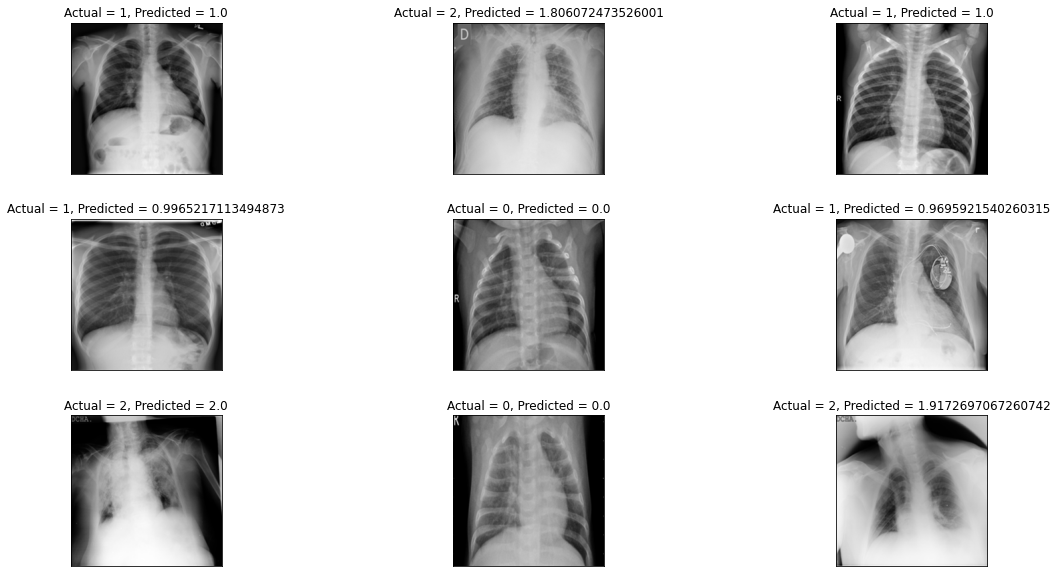

In [ ]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

**Accuracy Graph**

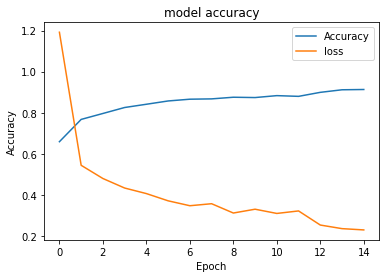

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])

plt.plot(hist.history['loss'])

plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","loss"])
plt.show()

**7) Confusion matrix**

In [ ]:
import matplotlib.pyplot as plt
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       366
           1       0.81      0.91      0.86       893
           2       0.90      0.87      0.88       936

    accuracy                           0.87      2195
   macro avg       0.89      0.85      0.87      2195
weighted avg       0.88      0.87      0.87      2195

Confusion Matrix
[[286  72   8]
 [  2 811  80]
 [  9 116 811]]


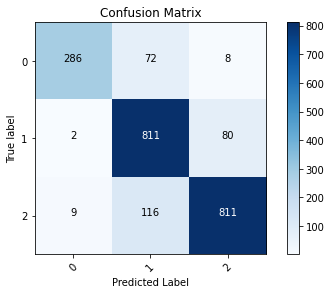

In [ ]:
import itertools

cm = confusion_matrix(y_test, y_pred= np.argmax(pred,axis=-1))
print(classification_report(y_test, np.argmax(pred,axis=-1)))
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap = plt.cm.Blues,model_name="name"):
    plt.imshow(cm,interpolation='nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        com = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion Matrix")
    print(cm)
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment = 'center',
                 color = "white" if cm[i,j]>thresh else "black")
        plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')
    plt.savefig("cm"+model_name+".jpg", dpi=600, bbox_inches='tight')
    plt.savefig("cm"+model_name+".png", dpi=300, bbox_inches='tight')
plot_confusion_matrix(cm,classes, title="Confusion Matrix",model_name="Alexnet")

8) Save trained model, weights


In [ ]:
# save model in JSON format
model_json = model.to_json()
json_file = open("/content/drive/MyDrive/Colab Notebooks/model1.json", "w")
json_file.write(model_json)
print("Model saved in JSON format!")
    
# save training weights in h5 file
model.save_weights("/content/model1.h5")
print("\nModel weights saved!")

Model saved in JSON format!

Model weights saved!


**Convert To tflite**

In [ ]:
import tensorflow as tf

#model = tf.keras.models.load_model('/content/model1.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("model1.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpcd3cfgcr/assets


**Convert To tflite**

In [ ]:
# save model in tflite
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
from google.colab import files
files.download('model.tflite')
